In [30]:
# Dependencies and Setup
%load_ext lab_black
import pandas as pd
import numpy as np
import requests
import json
import world_bank_data as wb
import plotly
import plotly.express as px

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [31]:
# Extracting GDP_2018 data from World Bank using wrapped api
GDP_WB = wb.get_series(
    "NY.GDP.MKTP.CD", date="2018", id_or_value="id", simplify_index=True
)
GDP_WB

Country
ARB    2.772025e+12
CSS    7.345916e+10
CEB    1.637175e+12
EAR    1.163520e+13
EAS    2.634698e+13
           ...     
VIR             NaN
PSE    1.461590e+10
YEM    2.759126e+10
ZMB    2.700524e+10
ZWE    2.431156e+10
Name: NY.GDP.MKTP.CD, Length: 264, dtype: float64

In [32]:
# Creating data frame for World Bank's GDP_2018 data: df_GDP
df_GDP = pd.DataFrame(GDP_WB).reset_index()
df_GDP

,Country,NY.GDP.MKTP.CD
0,ARB,2.772025e+12
1,CSS,7.345916e+10
2,CEB,1.637175e+12
3,EAR,1.163520e+13
4,EAS,2.634698e+13
...,...,...
259,VIR,NaN
260,PSE,1.461590e+10
261,YEM,2.759126e+10
262,ZMB,2.700524e+10


In [33]:
# Converting GDP-USD (NY.GDP.MKTP.CD) data to million
GDP_2018_million = np.array(df_GDP["NY.GDP.MKTP.CD"] / 1000000)
len(GDP_2018_million)

264

In [34]:
# Adding a new column "GDP_2018 (million)" to data frame df_GDP
df_GDP["GDP_2018 (million)"] = GDP_2018_million
df_GDP

,Country,NY.GDP.MKTP.CD,GDP_2018 (million)
0,ARB,2.772025e+12,2.772025e+06
1,CSS,7.345916e+10,7.345916e+04
2,CEB,1.637175e+12,1.637175e+06
3,EAR,1.163520e+13,1.163520e+07
4,EAS,2.634698e+13,2.634698e+07
...,...,...,...
259,VIR,NaN,NaN
260,PSE,1.461590e+10,1.461590e+04
261,YEM,2.759126e+10,2.759126e+04
262,ZMB,2.700524e+10,2.700524e+04


In [35]:
# Exporting & saving df_GDP data to csv file
# df_GDP.to_csv("Resources/GDP_WB.csv", index=False)

In [36]:
# Reading the csv files for independent and dependent variables
GDP_2018 = pd.read_csv("Resources/GDP_WB.csv")
innov_tech_2018 = pd.read_csv("Resources/Innovation&Technology_WB.csv")
doing_busn_2018 = pd.read_csv("Resources/DoingBusiness_WB.csv")
capital_lat_lng = pd.read_csv("Resources/Capital_Lat_Lng.csv")
FDI_USA_2018 = pd.read_csv("Resources/InwardFDI_USA_BeaGOV.csv")

In [37]:
# Merging GDP_2018 and innov_tech_2018 for Country and country_name
df_1 = pd.merge(GDP_2018, innov_tech_2018, on="Country", how="outer").drop(
    [
        "NY.GDP.MKTP.CD",
        "GDP_2018 (million)",
        "indicator_name",
        "indicator_code",
        "tech_export_2017 (million)",
        "tech_export_2018 (million)",
        "tech_export_2019 (million)",
    ],
    axis=1,
)

df_1

,Country,country_name
0,ARB,Arab World
1,CSS,Caribbean small states
2,CEB,NaN
3,EAR,NaN
4,EAS,NaN
...,...,...
259,VIR,NaN
260,PSE,West Bank and Gaza
261,YEM,"Yemen, Rep."
262,ZMB,Zambia


In [38]:
# Merging for capital_city, lat, and lng
df_2 = pd.merge(df_1, capital_lat_lng, on="country_name", how="outer")
df_2

,Country,country_name,capital_city,lat,lng
0,ARB,Arab World,NaN,NaN,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667
2,CEB,NaN,NaN,NaN,NaN
3,EAR,NaN,NaN,NaN,NaN
4,EAS,NaN,NaN,NaN,NaN
...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745


In [39]:
# Merging for GDP_2018 (million)
df_3 = pd.merge(df_2, GDP_2018, on="Country", how="outer").drop(
    ["NY.GDP.MKTP.CD"], axis=1,
)
df_3

,Country,country_name,capital_city,lat,lng,GDP_2018 (million)
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07
...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN


In [40]:
# Merging for tech_export_2018 (million)
df_4 = (
    pd.merge(df_3, innov_tech_2018, on="country_name", how="outer")
    .drop(
        [
            "Country_y",
            "indicator_name",
            "indicator_code",
            "tech_export_2017 (million)",
            "tech_export_2019 (million)",
        ],
        axis=1,
    )
    .rename(columns={"Country_x": "country_code"})
)

df_4

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million)
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04,NaN
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06,NaN
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07,NaN
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07,NaN
...,...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN,NaN


In [41]:
# Merging for doing_business_2018
df_5 = pd.merge(df_4, doing_busn_2018, on="country_name", how="outer").drop(
    ["doing_business_2017", "doing_business_2019"], axis=1,
)
df_5

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06,NaN,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04,NaN,NaN
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06,NaN,NaN
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07,NaN,NaN
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07,NaN,NaN
...,...,...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN,NaN,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN,NaN,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN,NaN,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN,NaN,NaN


In [42]:
# Dependent Variable = FDI in USA; extracting FDI in USA data for 2018 and cleaning for null values
df_6 = FDI_USA_2018.drop(
    ["fdi_USA_2017 (million)", "fdi_USA_2019 (million)"], axis=1,
).dropna()

df_6

,country_name,region,fdi_USA_2018 (million)
0,Afghanistan,Asia,1.0
1,Albania,Europe,0.0
3,Andorra,Europe,0.0
6,Antigua and Barbuda,Latin America,3.0
7,Argentina,Latin America,822.0
...,...,...,...
201,Vietnam,Asia,59.0
202,Western Sahara,Africa,0.0
203,"Yemen, Rep.",Asia,0.0
204,Zambia,Africa,-6.0


In [43]:
# Creating the clean dataset for analysis
clean_data = pd.merge(df_5, df_6, on="country_name", how="right")
clean_data

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
0,AFG,Afghanistan,Kabul,34.5289,69.1725,19484.384937,NaN,37.1,Asia,1.0
1,ALB,Albania,Tiranë (Tirana),41.3275,19.8189,15147.020535,0.5917,66.8,Europe,0.0
2,AND,Andorra,Andorra la Vella,42.5078,1.5211,3218.316013,33.9135,NaN,Europe,0.0
3,ATG,Antigua and Barbuda,St. John's,17.1172,-61.8457,1610.574074,0.0114,59.8,Latin America,3.0
4,ARG,Argentina,Buenos Aires,-34.6051,-58.4004,519871.519808,647.1724,57.3,Latin America,822.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,Taiwan,Taibei,25.0470,121.5457,NaN,NaN,80.7,Asia,10512.0
176,NaN,Western Sahara,El Aaiún,27.1532,-13.2014,NaN,NaN,NaN,Africa,0.0
177,NaN,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,Latin America,1335.0
178,NaN,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,Africa,0.0


# Begin Eds Work

Europe is an anomoly compared to the rest of the regions of the world in that it is wholly comprised of industrialized, first world countries with largely capitalistic economies.  
Likely also due, in part, to the binding policies of the EU, all of the European countries score well above global average with regards to their Doing Business Score (A guage of regulatory affect on business).
Althought there is a loose association between GDP and FDI, the trend is not pronounced outside of the extremes.
One intersting outlier would be the country of Luxembourg, in that as a small country with a regionally low GDP, it ranks 4th in the region for FDI in spite of a lower than average Doing Business Score compared to the rest of the region

In [44]:
import plotly.graph_objects as go

In [45]:
# filter the cleaned data to specify only countries in "Europe" region.
europe = clean_data[clean_data.region == "Europe "]
# sort countries in decending order of FDI
europe_fdi_sort = europe.sort_values(by=["fdi_USA_2018 (million)"], ascending=False)

europe_fdi_sort.head()

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
166,GBR,United Kingdom,London,51.5085,-0.1257,2.860668e+06,76926.5410,83.2,Europe,496622.0
109,NLD,Netherlands,Amsterdam,52.3740,4.8897,9.141048e+05,85690.5732,76.1,Europe,462303.0
54,DEU,Germany,Berlin,52.5244,13.4105,3.949549e+06,210000.0000,79.3,Europe,328124.0
88,LUX,Luxembourg,Luxembourg,49.6117,6.1300,7.091996e+04,858.2699,69.6,Europe,312976.0
150,CHE,Switzerland,Bern,46.9481,7.4474,7.051406e+05,30136.2426,76.6,Europe,295783.0


In [46]:
clean_data.groupby(clean_data["region"])[["doing_business_2018"]].mean()

,doing_business_2018
region,
Africa,51.248936
Asia,60.363415
Australia,80.800000
Canada,79.300000
Europe,73.620455
Latin America,59.065517
New Zealand,87.000000


In [47]:
clean_data["doing_business_2018"].mean()

61.481097560975606

In [48]:
# rename the columns for better display in plots
europe_format_name = europe_fdi_sort.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business Score",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)

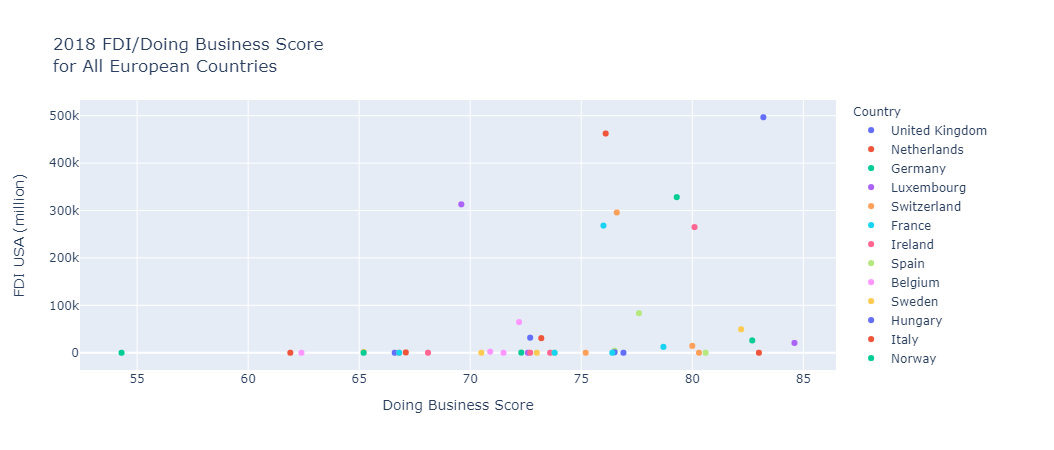

In [49]:
# create scatter plot showing relationship between FDI and Doing Business Score for all countries
europe_fdi_db_scatter = px.scatter(
    europe_format_name,
    x="Doing Business Score",
    y="FDI USA (million)",
    title="2018 FDI/Doing Business Score<br>for All European Countries",
    color="Country",
)
europe_fdi_db_scatter.write_image("europe_fdi_db_scatter.png")
europe_fdi_db_scatter

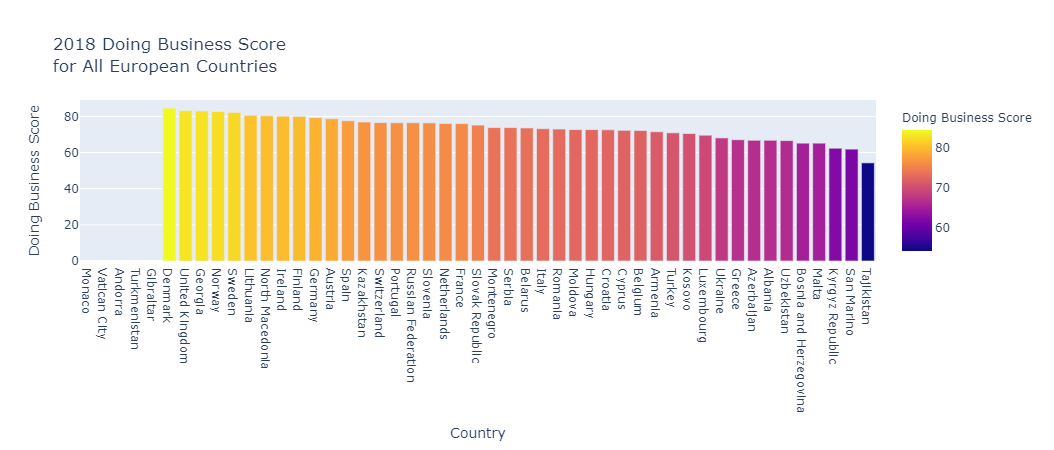

In [50]:
europe_db_sort = europe.sort_values(by=["doing_business_2018"], ascending=False)
europe_db_sort_name = europe_fdi_sort.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business Score",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)
europe_fdi_db_bar = px.bar(
    europe_db_sort_name,
    x="Country",
    y="Doing Business Score",
    title="2018 Doing Business Score<br>for All European Countries",
    color="Doing Business Score",
)
europe_fdi_db_bar.update_layout(
    barmode="stack", xaxis={"categoryorder": "total descending"}
)
europe_fdi_db_bar.write_image("europe_fdi_db_bar.png")
europe_fdi_db_bar

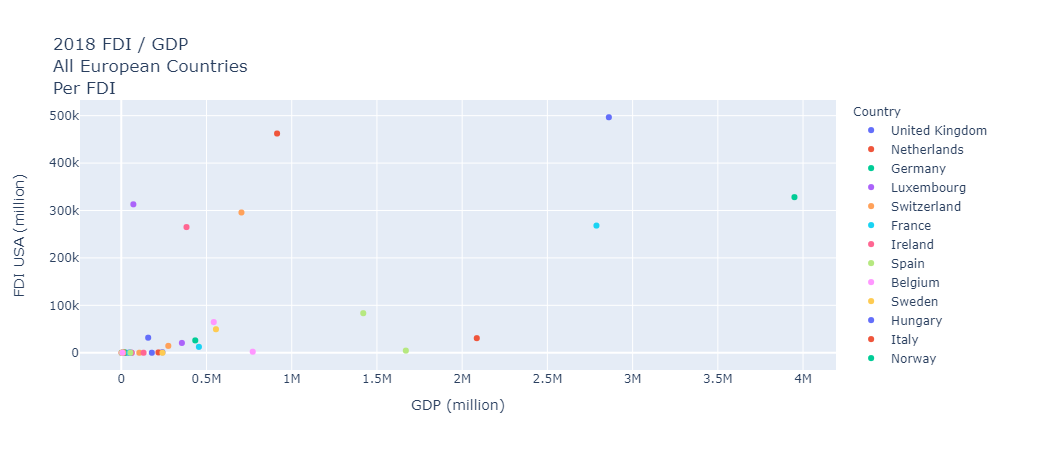

In [51]:
# create scatter plot showing relationship between FDI and GDP for all countries
europe_fdi_gdp_scatter = px.scatter(
    europe_format_name,
    x="GDP (million)",
    y="FDI USA (million)",
    title="2018 FDI / GDP<br>All European Countries<br>Per FDI",
    color="Country",
)
europe_fdi_gdp_scatter.write_image("europe_fdi_gdp_scatter.png")
europe_fdi_gdp_scatter

In [52]:
# create 3D plot showing relationship between all three data points for all countries
europe_fdi_gdp_db_3d = px.scatter_3d(
    europe_format_name,
    x="GDP (million)",
    y="FDI USA (million)",
    z="Doing Business Score",
    width=2000,
    height=1200,
    title="2018 FDI / GDP / Doing Business Score<br>All European Countries<br>Per FDI",
    color="Country",
)
europe_fdi_gdp_db_3d.write_image("europe_fdi_gdp_db_3d.png")
europe_fdi_gdp_db_3d

# Begin Europe top 10 by GDP

In [53]:
europe = clean_data[clean_data.region == "Europe "]
europe_top_10 = europe.sort_values(by=["fdi_USA_2018 (million)"], ascending=False)
# reduce the dataset to just the top 10 countries based on FDI for use on top 10 plots
europe_top_10 = europe_top_10.head(10)
europe_top_10

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
166,GBR,United Kingdom,London,51.5085,-0.1257,2.860668e+06,76926.5410,83.2,Europe,496622.0
109,NLD,Netherlands,Amsterdam,52.3740,4.8897,9.141048e+05,85690.5732,76.1,Europe,462303.0
54,DEU,Germany,Berlin,52.5244,13.4105,3.949549e+06,210000.0000,79.3,Europe,328124.0
88,LUX,Luxembourg,Luxembourg,49.6117,6.1300,7.091996e+04,858.2699,69.6,Europe,312976.0
150,CHE,Switzerland,Bern,46.9481,7.4474,7.051406e+05,30136.2426,76.6,Europe,295783.0
50,FRA,France,Paris,48.8534,2.3488,2.787864e+06,118000.0000,76.0,Europe,268169.0
68,IRL,Ireland,Dublin,53.3331,-6.2489,3.826744e+05,36493.7948,80.1,Europe,265004.0
143,ESP,Spain,Madrid,40.4165,-3.7026,1.419735e+06,16982.2448,77.6,Europe,83379.0
14,BEL,Belgium,Bruxelles-Brussel,50.8467,4.3499,5.426859e+05,36817.0180,72.2,Europe,64661.0
149,SWE,Sweden,Stockholm,59.3326,18.0649,5.554554e+05,17441.8322,82.2,Europe,49546.0


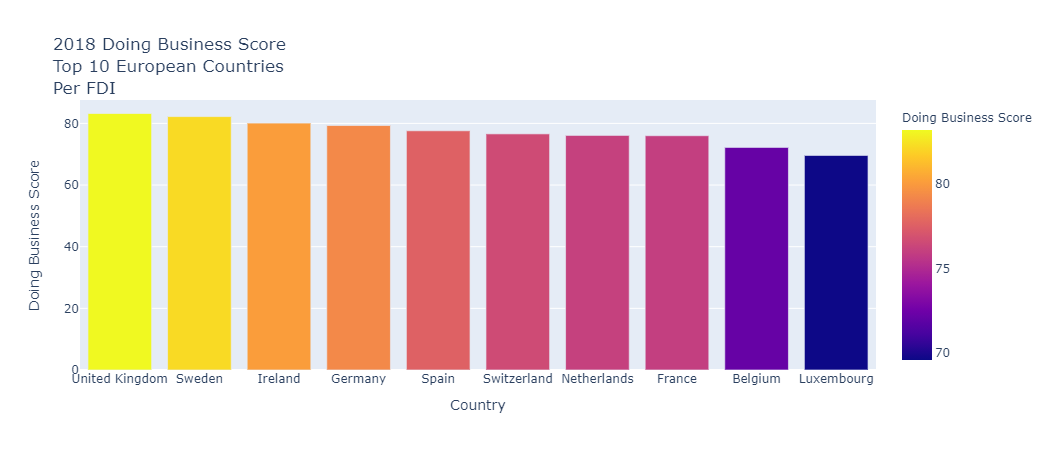

In [54]:
europe_top_10_db_sort = europe_top_10.sort_values(
    by=["doing_business_2018"], ascending=False
)
europe_top_10_db_sort_name = europe_top_10_db_sort.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business Score",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)
europe_top_10_db_bar = px.bar(
    europe_top_10_db_sort_name,
    x="Country",
    y="Doing Business Score",
    title="2018 Doing Business Score<br>Top 10 European Countries<br>Per FDI",
    color="Doing Business Score",
)
europe_top_10_db_bar.write_image("europe_top_10_db_bar.png")
europe_top_10_db_bar

In [55]:
# # rename the columns for better display in plots **specific to top 10**
europe_top_10_format_name = europe_top_10.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business Score",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)

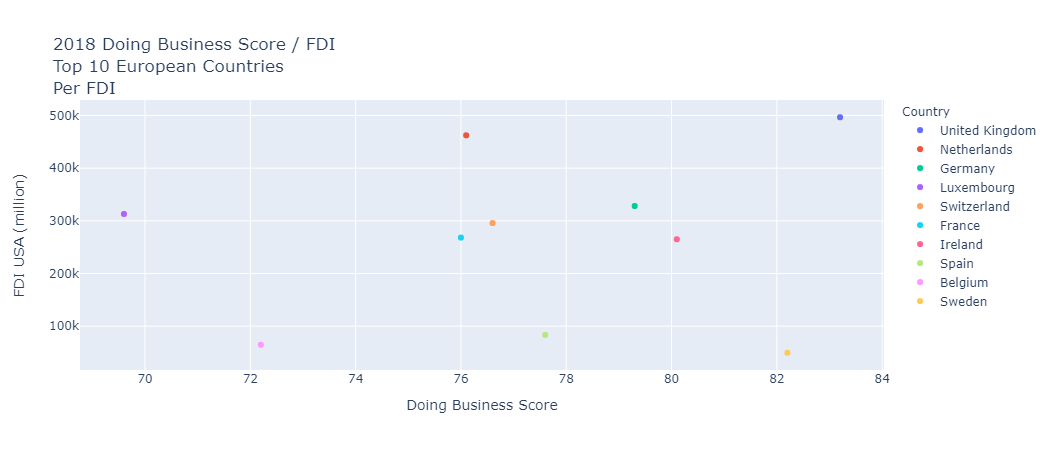

In [56]:
# create scatter plot showing relationship between FDI and Doing Business Score for top 10 countries
europe_top_10_fdi_db_scatter = px.scatter(
    europe_top_10_format_name,
    x="Doing Business Score",
    y="FDI USA (million)",
    title="2018 Doing Business Score / FDI<br>Top 10 European Countries<br>Per FDI",
    color="Country",
)
europe_top_10_fdi_db_scatter.write_image("europe_top_10_fdi_db_scatter.png")
europe_top_10_fdi_db_scatter

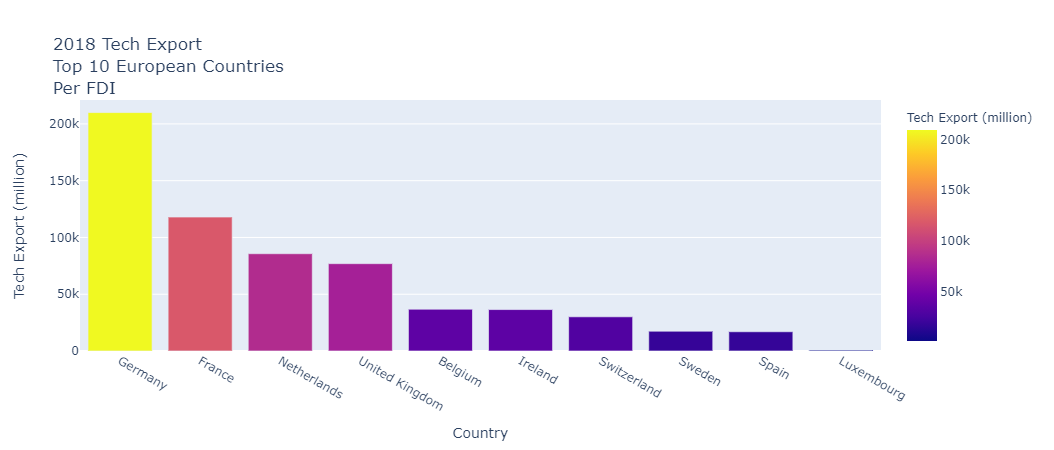

In [57]:
europe_top_10_db_sort = europe_top_10.sort_values(
    by=["tech_export_2018 (million)"], ascending=False
)

europe_top_10_db_sort_name = europe_top_10_db_sort.rename(
    columns={
        "country_name": "Country",
        "GDP_2018 (million)": "GDP (million)",
        "tech_export_2018 (million)": "Tech Export (million)",
        "doing_business_2018": "Doing Business Score",
        "fdi_USA_2018 (million)": "FDI USA (million)",
    }
)

europe_top_10_tech_bar = px.bar(
    europe_top_10_db_sort_name,
    x="Country",
    y="Tech Export (million)",
    title="2018 Tech Export<br>Top 10 European Countries<br>Per FDI",
    color="Tech Export (million)",
)
europe_top_10_tech_bar.update_layout(
    barmode="stack", xaxis={"categoryorder": "total descending"}
)
europe_top_10_tech_bar.write_image("europe_top_10_tech_bar.png")
europe_top_10_tech_bar

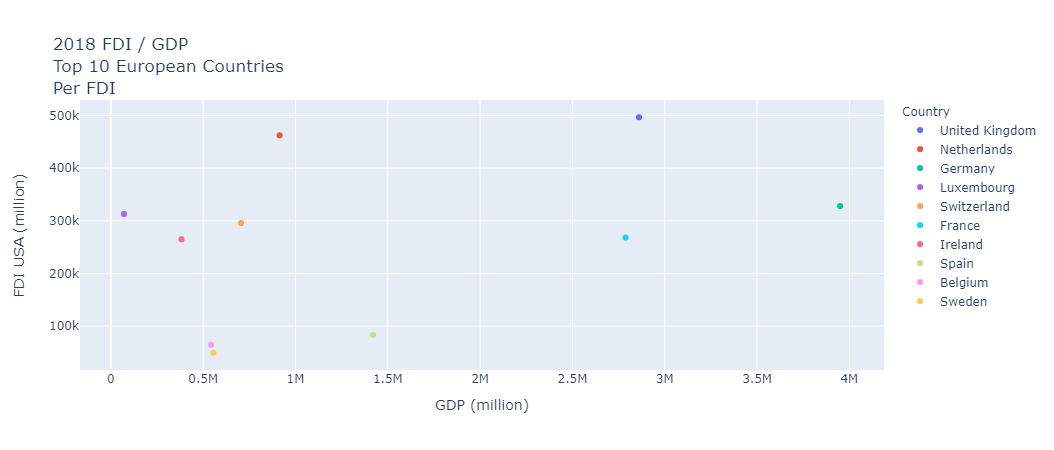

In [58]:
# create scatter plot showing relationship between FDI and GDP for top 10 countries
europe_top_10_fdi_gdp_scatter = px.scatter(
    europe_top_10_format_name,
    x="GDP (million)",
    y="FDI USA (million)",
    title="2018 FDI / GDP<br>Top 10 European Countries<br>Per FDI",
    color="Country",
)
europe_top_10_fdi_gdp_scatter.write_image("europe_top_10_fdi_gdp_scatter.png")
europe_top_10_fdi_gdp_scatter

In [59]:
# create 3D plot showing relationship between all three data points for all countries
europe_top_10_fdi_gdp_db_3d = px.scatter_3d(
    europe_top_10_format_name,
    x="FDI USA (million)",
    y="GDP (million)",
    z="Doing Business Score",
    width=2000,
    height=1200,
    title="2018 FDI / GDP / Doing Business Score<br>Top 10 European Countries<br>Per FDI",
    color="Country",
)
europe_top_10_fdi_gdp_db_3d.write_image("europe_top_10_fdi_gdp_db_3d.png")
europe_top_10_fdi_gdp_db_3d

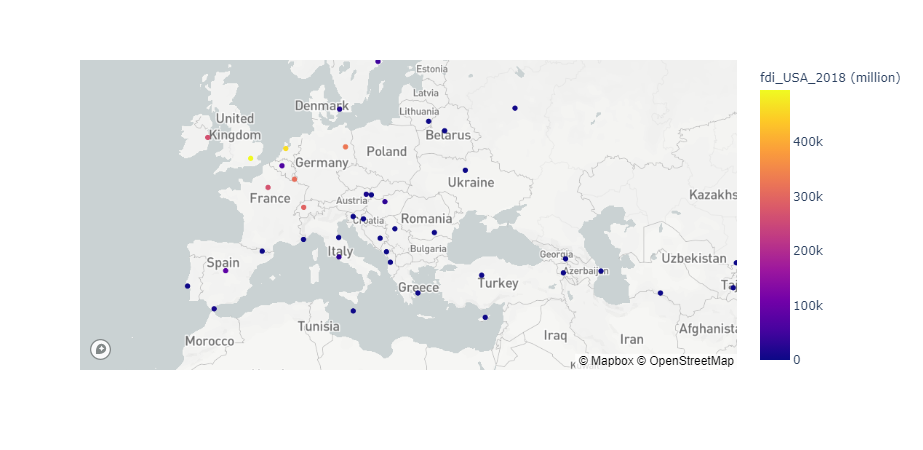

In [73]:
from map_code import mapbox_token

px.set_mapbox_access_token(mapbox_token)
europe_scattermap = px.scatter_mapbox(
    europe,
    lat="lat",
    lon="lng",
    color="fdi_USA_2018 (million)",
    hover_data=["country_name"],
    zoom=2.3,
)
europe_scattermap

europe_scattermap.write_image("europe_scattermap.png")
europe_scattermap